(1143, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residu

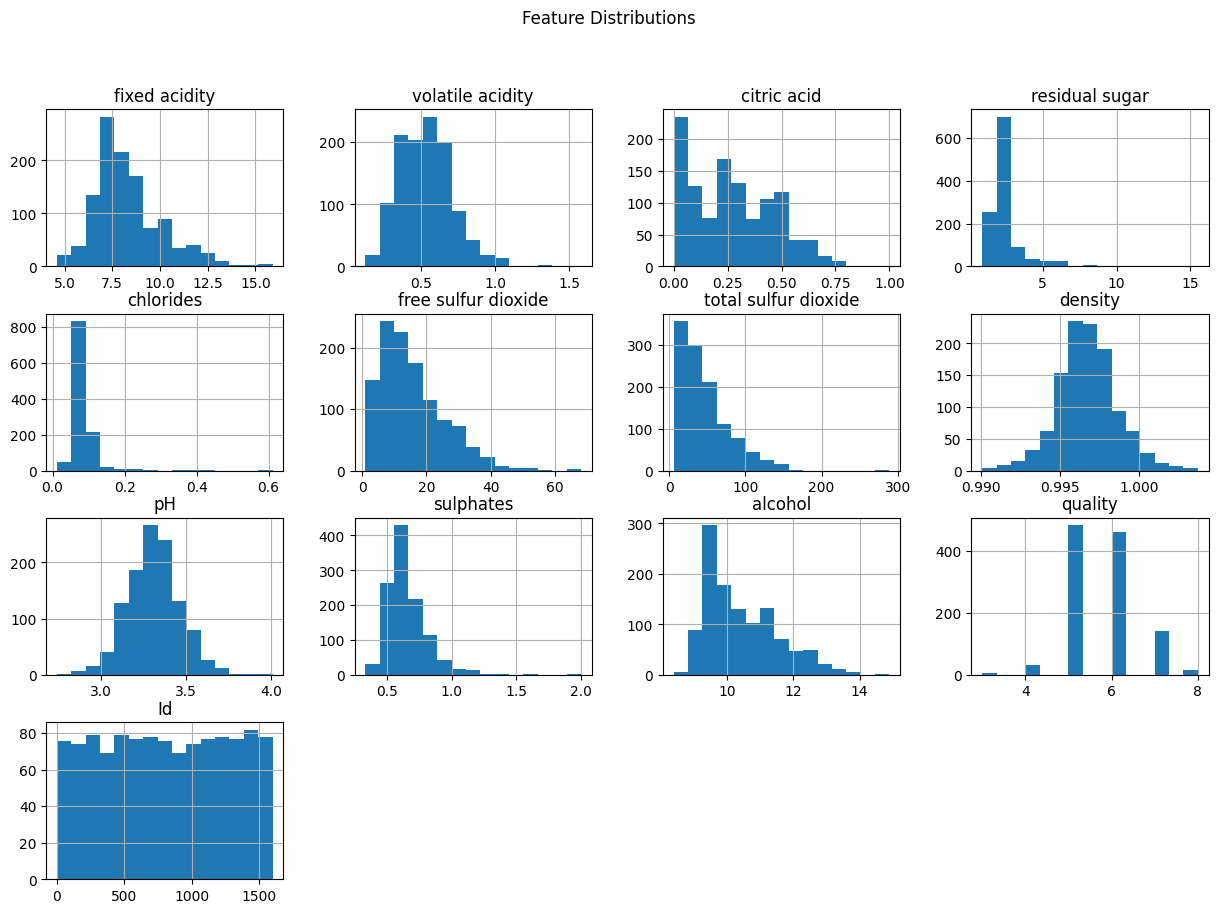

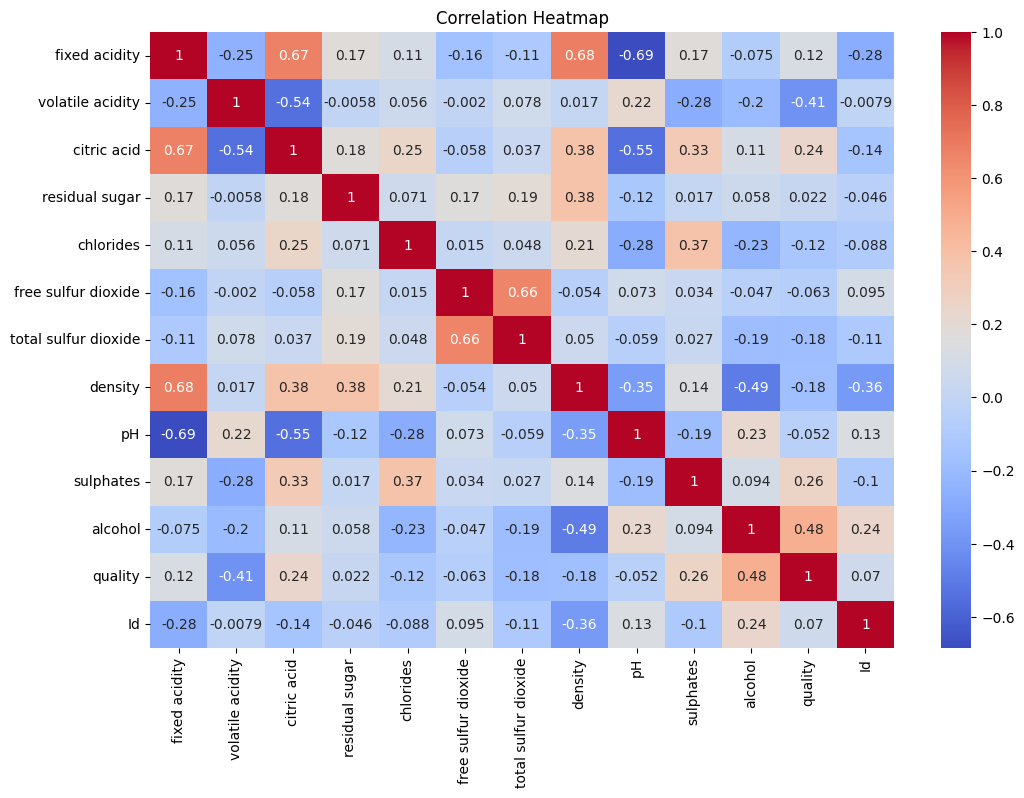

RF Mean CV MAE: 0.4615
Ridge Mean CV MAE: 0.5106
MAE: 0.4109
MSE: 0.2980
R2 Score: 0.4645


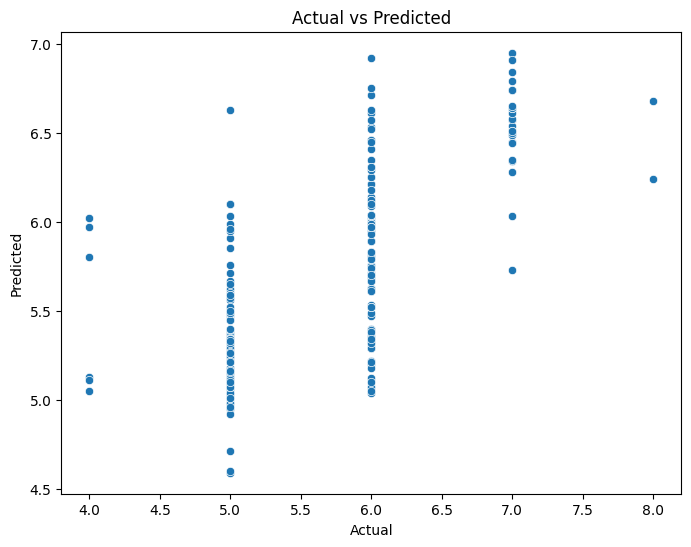

✅ Model saved to model.pkl


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

# 2. Load dataset
df = pd.read_csv("../data/winequality.csv")  # adjust path if needed
df.head()

# 3. Basic info
print(df.shape)
print(df.info())
print(df.describe())

# 4. Check missing values
print(df.isnull().sum())

# 5. EDA - histograms
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 6. Features & target
X = df.drop("quality", axis=1)
y = df["quality"]

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Train two models
rf = RandomForestRegressor(random_state=42)
ridge = Ridge()

# Cross-validation
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
ridge_cv = cross_val_score(ridge, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")

print(f"RF Mean CV MAE: {-np.mean(rf_cv):.4f}")
print(f"Ridge Mean CV MAE: {-np.mean(ridge_cv):.4f}")

# 9. Fit final RandomForest model
rf.fit(X_train, y_train)

# 10. Predictions & metrics
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 11. Residual plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# 12. Save the final model
joblib.dump(rf, "../model.pkl")
print("✅ Model saved to model.pkl")
